In [1]:
# load .py file with all functions
from function_XGB import *
cwd = os.getcwd()
print("Current working directory: ", cwd)

Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:14:58) [MSC v.1929 64 bit (AMD64)]
NumPy version: 1.23.3
Pandas version: 1.5.3
scikit-learn version: 1.2.2
xgboost version: 1.7.4
Matplotlib version: 3.7.1
Current working directory:  f:\NEON_gapfill


# working directory

In [2]:
sitename = "BART_NEON"
site_data_dir = Path(f"F:/NEON_gapfill/") # local working environment
# site_data_dir = Path("/home/jovyan") # binder working directory
model_dir = site_data_dir / "XGB_models"
model_dir.mkdir(exist_ok=True)
data_train_test_dir = site_data_dir / "FC_data_train_test"

#sys.path.append(site_data_dir)
#os.chdir(site_data_dir)

# input features and target variable


In [3]:
predictors = ['TIMESTAMP_END', 'GCC', 'EVI', 'Tair', 'VPD', 'PPFD']
y_col = "NEE_for_gapfill"

# load data

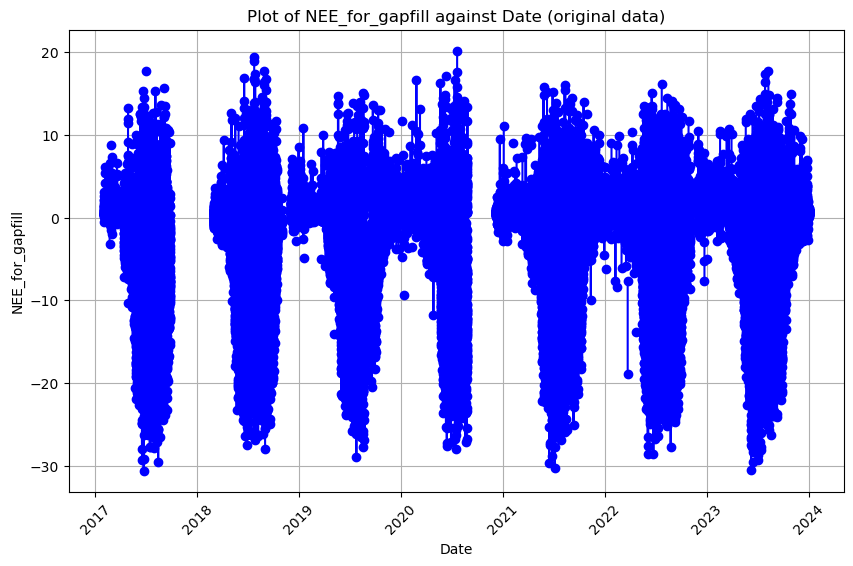

In [4]:
site_name = "BART_NEON"
file_name = f"data_for_XGB_{site_name}.csv"  
site_data, site_data_no_na = load_data(site_data_dir, file_name, y_col)

# 01 find the best hyperparameters

In [10]:
# find_hyperparameters(site_data_no_na, predictors, y_col, model_dir) 
# this line takes a long time to run (> 5 hours), please skip it and load the saved model to test the rest of the script

In [5]:
# load the model after hyperparameter tuning
model_path = (model_dir ) / "FC_XGB_model.pkl"
with open(model_path, 'rb') as f:
    reg = pkl.load(f)
reg = XGBRegressor(device='cpu')
reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

# 02 model performance

In [ ]:
# create_train_test_folds(site_data, site_data_dir, y_col) 
# I saved 10 fold train and test data under / data_train_test_dir, then read in the data in the check_model_performance, which is not very efficient

Train/test files saved in F:\NEON_gapfill\FC_data_train_test


Processing Fold 1...
[10:21:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



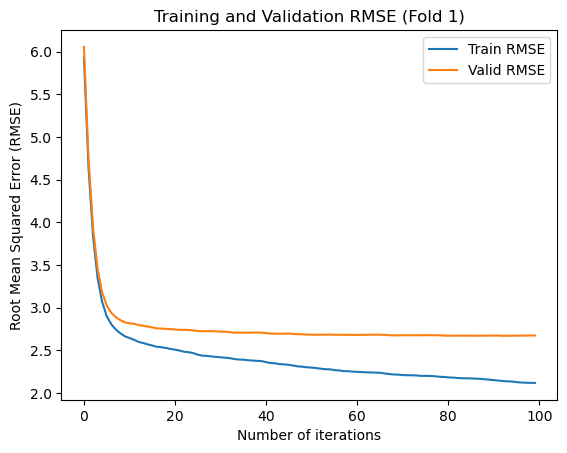

{'RMSE': 2.67059556227223, 'R2': 0.8551987188115264, 'MAPE': 81.76410920837243}
Processing Fold 2...
[10:21:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



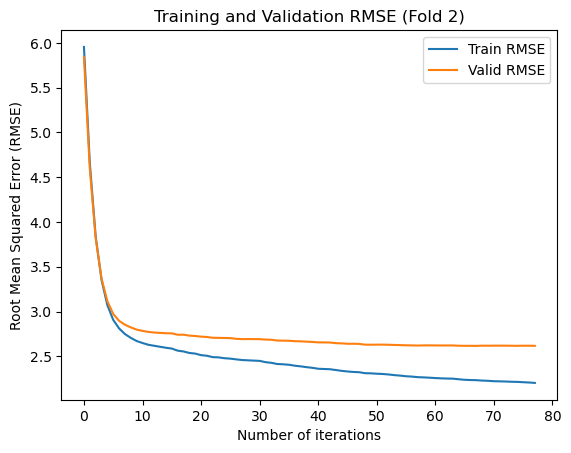

{'RMSE': 2.6164512142260157, 'R2': 0.8552857605131459, 'MAPE': 74.0335232544093}
Processing Fold 3...
[10:21:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



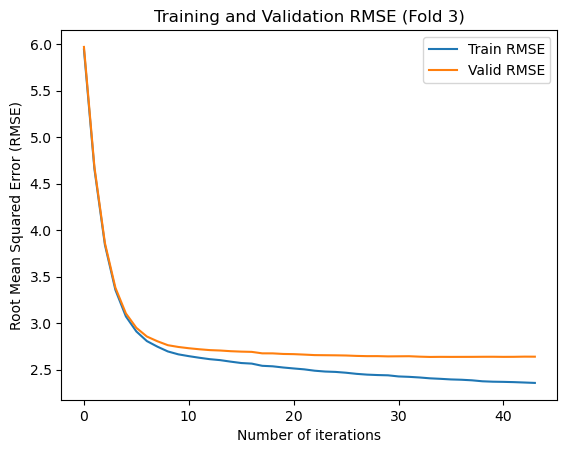

{'RMSE': 2.6376949296340713, 'R2': 0.8572768504397185, 'MAPE': 82.89427590187242}
Processing Fold 4...
[10:21:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



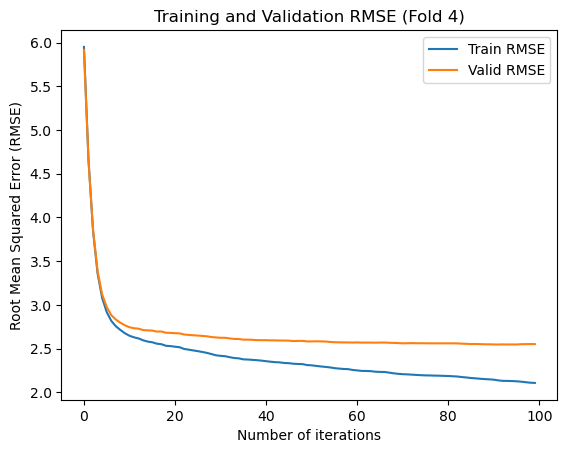

{'RMSE': 2.5479788993130557, 'R2': 0.8654793323663121, 'MAPE': 80.09187276865276}
Processing Fold 5...
[10:21:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



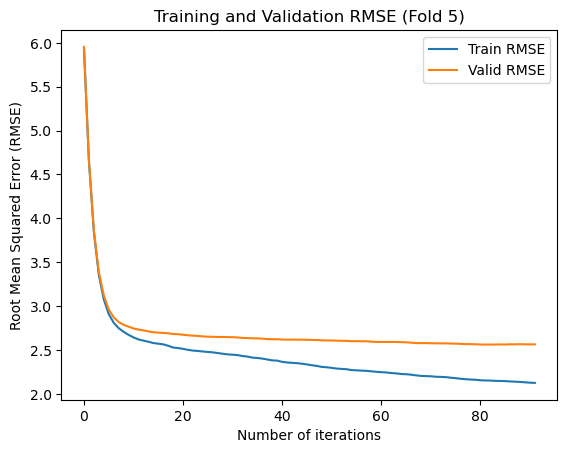

{'RMSE': 2.561620485685439, 'R2': 0.8650897339606423, 'MAPE': 77.03852340923297}
Processing Fold 6...
[10:21:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



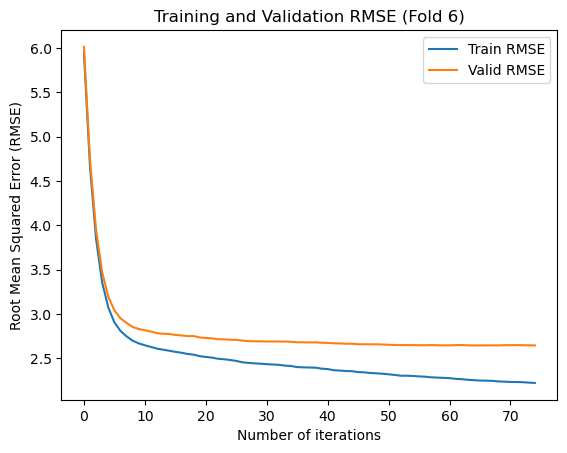

{'RMSE': 2.643716624688252, 'R2': 0.8582695853957063, 'MAPE': 72.53779246852}
Processing Fold 7...
[10:21:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



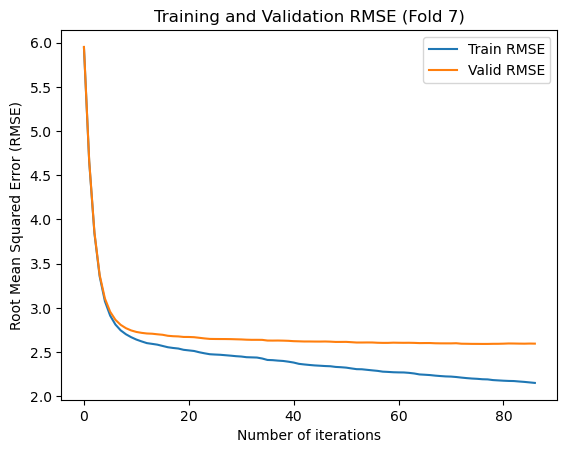

{'RMSE': 2.5917868883128587, 'R2': 0.8607169176324004, 'MAPE': 79.55909031261059}
Processing Fold 8...
[10:21:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



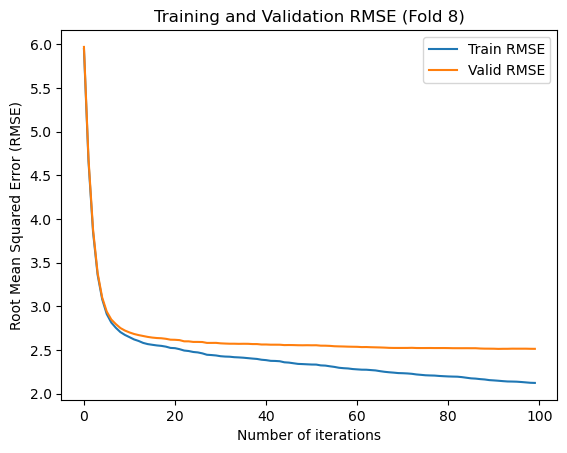

{'RMSE': 2.5125759394882126, 'R2': 0.8696561596013479, 'MAPE': 73.14564552025207}
Processing Fold 9...
[10:21:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



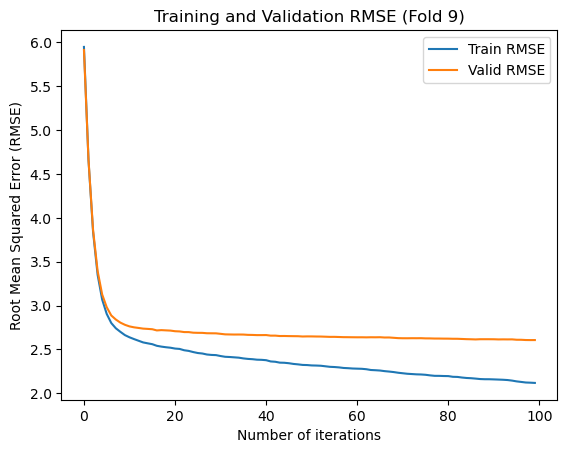

{'RMSE': 2.6070467399183728, 'R2': 0.8576118148905333, 'MAPE': 89.93551214208885}
Processing Fold 10...
[10:21:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



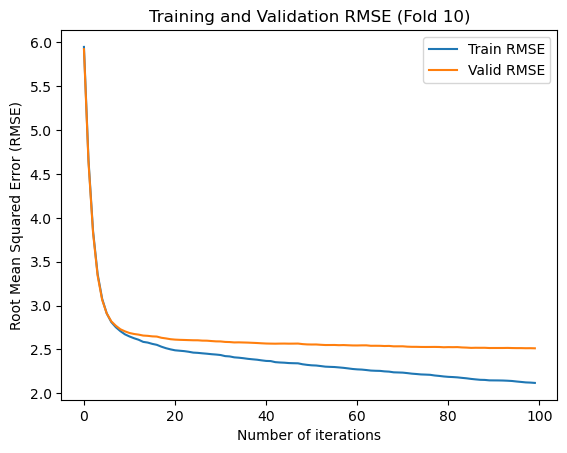

{'RMSE': 2.512937960427257, 'R2': 0.8694611337018111, 'MAPE': 71.35056528064923}
--------------------------------------------------------

Mean RMSE: 2.590 ± 0.052
Mean R²: 0.861 ± 0.005
Mean MAPE: 78.235 ± 5.487
--------------------------------------------------------


In [6]:
check_model_performance(data_train_test_dir, predictors, y_col, reg)
# I do not know why, but the learning curves do not look like exactly the same as I did before ...

# 03 do gapfill 

In [17]:
get_accurate_prediction(site_data, site_data_no_na, predictors, y_col, site_data_dir, reg)

[14:38:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.

Predictions saved to: F:\NEON_gapfill\FC_XGB_prediction.csv


,Year,Day,Hour,Date,Month,DOY,TIMESTAMP_END,GCC,EVI,Tair,...,DOY_sin,DOY_cos,NEE_for_gapfill,PPFD,H_for_gapfill,LE_for_gapfill,P_7day,P_30day,XGB_FC_fall,XGB_FC_f
0,2017,1,0.5,2017-01-01,1,1,201701010030,0.34364,0.215800,-4.892428,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.871892,0.871892
1,2017,1,1.0,2017-01-01,1,1,201701010100,0.34364,0.215800,-4.475620,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.871892,0.871892
2,2017,1,1.5,2017-01-01,1,1,201701010130,0.34364,0.215800,-4.684024,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.871892,0.871892
3,2017,1,2.0,2017-01-01,1,1,201701010200,0.34364,0.215800,-4.713796,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.871892,0.871892
4,2017,1,2.5,2017-01-01,1,1,201701010230,0.34364,0.215800,-4.753492,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.871892,0.871892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122673,2023,31,17.0,2023-12-31,12,365,202312311700,0.34500,0.242523,-4.352200,...,-0.017166,0.999853,NaN,0.6200,-17.674933,5.915219,18.611,232.3,0.841287,0.841287
122674,2023,31,17.5,2023-12-31,12,365,202312311730,0.34500,0.242523,-4.543100,...,-0.017166,0.999853,NaN,0.1400,-19.945106,1.918483,18.611,232.3,0.777217,0.777217
122675,2023,31,18.0,2023-12-31,12,365,202312311800,0.34500,0.242523,-4.665800,...,-0.017166,0.999853,NaN,0.1400,-24.592497,7.285188,18.611,232.3,0.777217,0.777217
122676,2023,31,18.5,2023-12-31,12,365,202312311830,0.34500,0.242523,-4.818400,...,-0.017166,0.999853,1.194168,0.1500,-44.558458,12.799249,18.611,232.3,0.878554,1.194168


# 04 feature importances

[14:38:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device" } are not used.



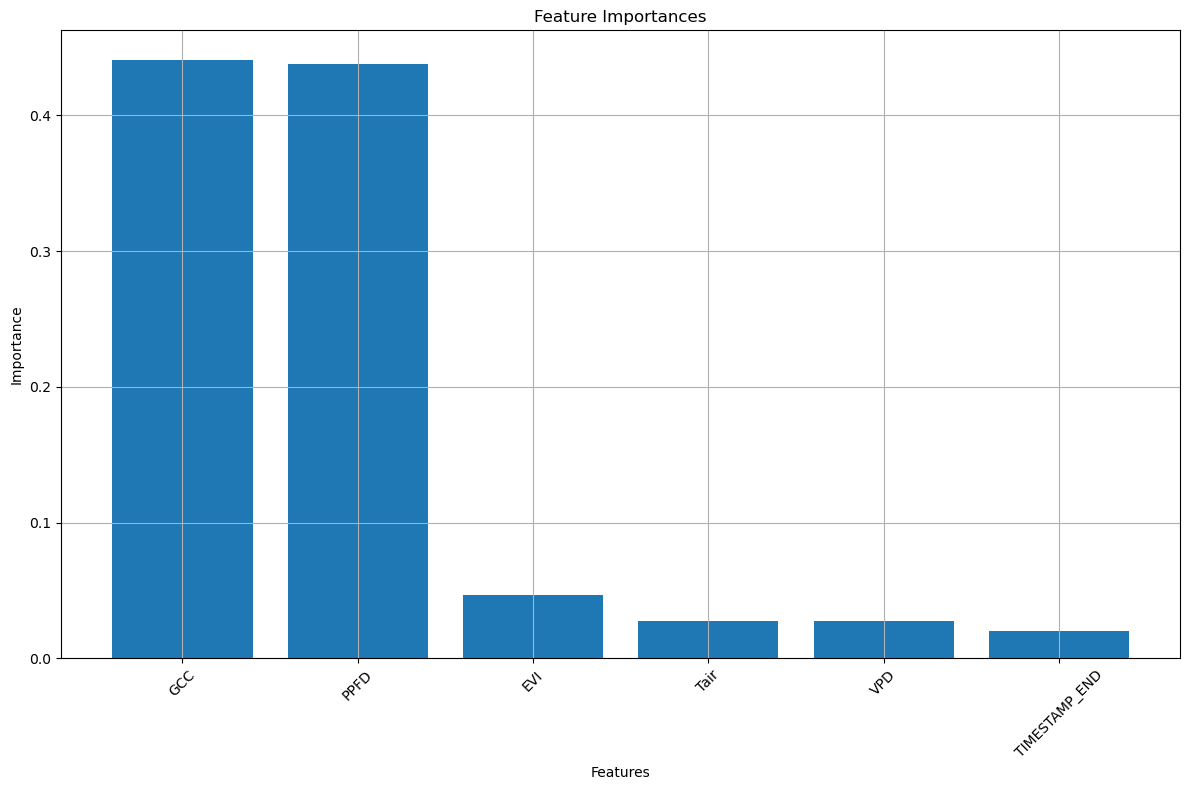

,Feature_Importances,predictors
1,0.440525,GCC
5,0.437640,PPFD
2,0.047012,EVI
3,0.027377,Tair
4,0.027291,VPD
0,0.020154,TIMESTAMP_END


In [18]:
feature_importance(site_data_no_na, predictors, y_col, site_data_dir, reg)

# 05 annual sums and monthly sums

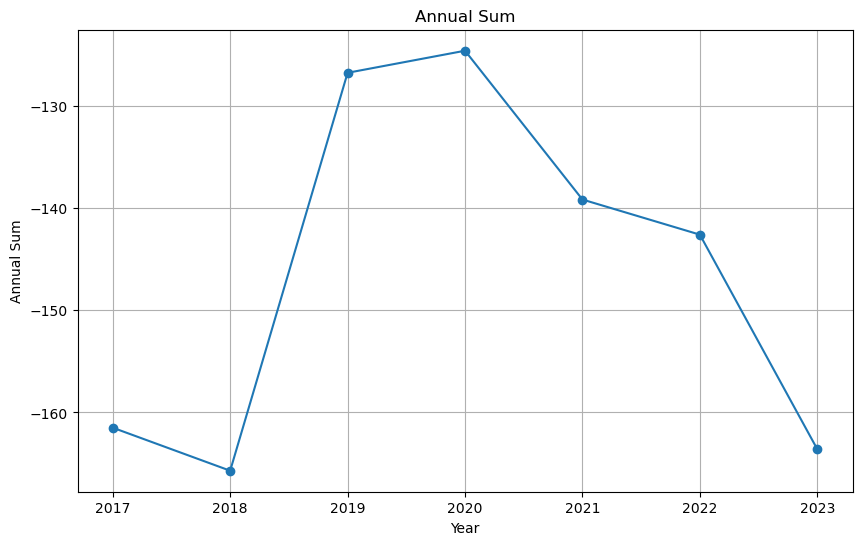

,Year,annual_sum
0,2017,-161.497959
1,2018,-165.708498
2,2019,-126.756605
3,2020,-124.596157
4,2021,-139.163420
5,2022,-142.601187
6,2023,-163.603832


In [19]:
data_prediction = pd.read_csv(site_data_dir/ "FC_XGB_prediction.csv")
cal_annual_sum(data_prediction, "XGB_FC_f", 2017, 2023, site_data_dir)

Check if you have 'Month' and 'Year' columns in input data!


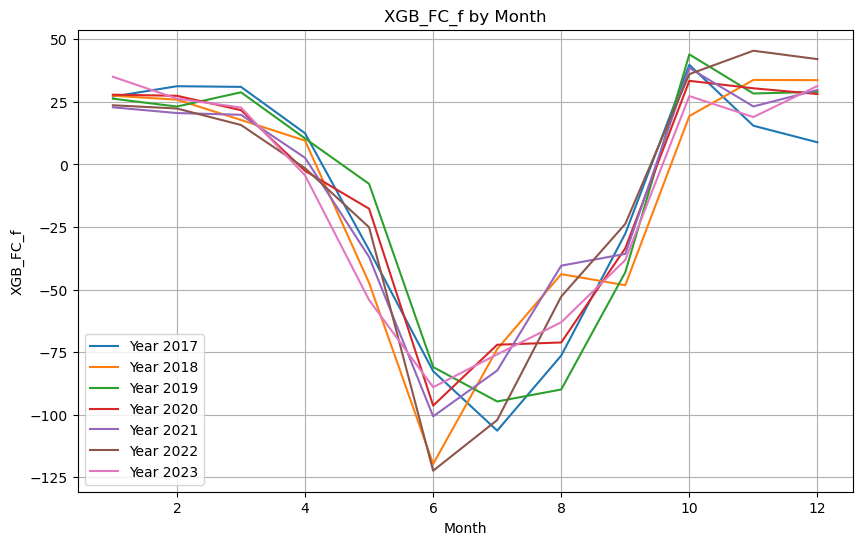

,Year,Month,monthly_sum
0,2017,1,27.105164
1,2017,2,31.240031
2,2017,3,30.979599
3,2017,4,12.438320
4,2017,5,-34.225867
...,...,...,...
79,2023,8,-63.092092
80,2023,9,-38.215303
81,2023,10,27.299337
82,2023,11,18.916490


In [20]:
cal_monthly_sum(data_prediction, "XGB_FC_f", 2017, 2023, site_data_dir)